In [26]:
import pandas as pd
import numpy as np
import plotly.express as px

In [70]:
start_date = '2020-08-31'
end_date = '2020-10-31'

In [71]:
battleground_df = pd.read_csv('label_data/2016_pres_labels_battleground.csv')[['state_po', 'battleground']]

In [72]:
state_probs = pd.merge(pd.read_csv('poll_data/all_pres_polls_d_probs.csv'), battleground_df)

In [73]:
mask = ((state_probs['date'] >= start_date) & (state_probs['date'] <= end_date))
state_probs = state_probs[mask].sort_values(by='date').reset_index(drop=True)

In [74]:
state_probs = state_probs.groupby(['date', 'state_po'], as_index=False).mean()

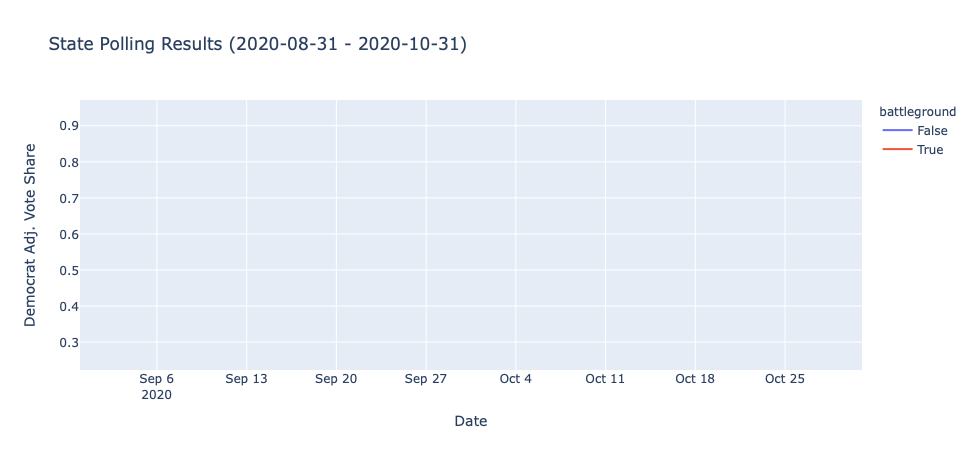

In [84]:
fig = px.line(state_probs, x="date", y="d_prob", color="battleground",
              line_group="state_po", hover_name="state_po",
             labels={'d_prob': 'Democrat Adj. Vote Share', 'date': 'Date'},
             title=f'State Polling Results ({start_date} - {end_date})')
fig.show()

In [80]:
var_df = pd.merge(pd.read_csv('poll_data/all_pres_polls_d_probs.csv'), battleground_df).groupby(['state_po', 'battleground'], as_index=False).var()

In [86]:
var_df = var_df.sort_values(by='d_prob')

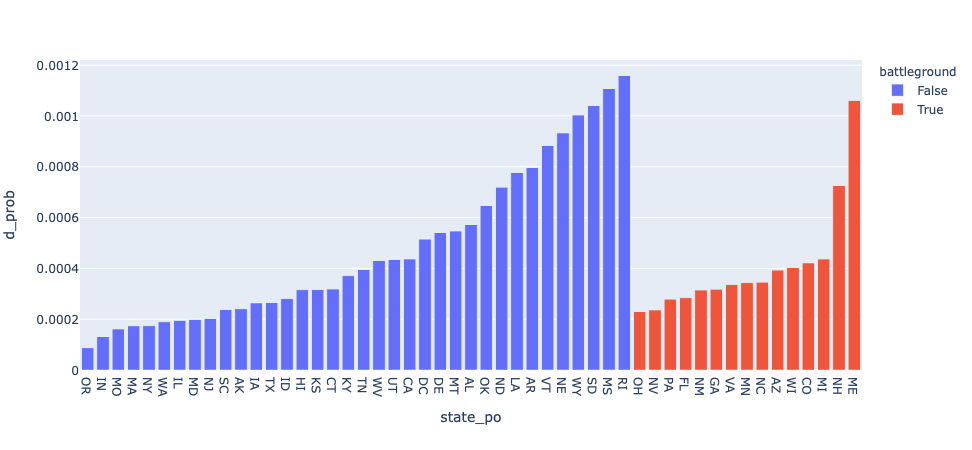

In [87]:
fig = px.bar(var_df, x="state_po", y="d_prob", color="battleground",
            )
fig.show()

In [90]:
var_df.groupby('battleground').mean()

,poll_id,question_id,sample_size,d_prob
battleground,,,,
False,4.033136e+06,2.305443e+07,4.689537e+06,0.000474
True,9.425511e+06,5.732554e+07,5.531686e+06,0.000408
